In [19]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import r2_score
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

SEED = 241


df = pd.read_csv("gbm-data.csv")
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [2]:
X = df.drop(['Activity'], axis=1).values
y = df['Activity'].values

In [3]:
X_train, X_test, y_train, y_test = \
                     train_test_split(X, y, \
                                      test_size=0.8, \
                                      random_state=SEED)

In [4]:
def write2file(num, filename):
    with open(filename, 'w') as f:
        f.write(f"{num}")
        
def write2file_many(num1, num2, filename):
    with open(filename, 'w') as f:
        f.write(f"{num1} {num2}")

In [13]:
def calc_min(score):
    min_logloss = np.inf
    min_idx = 0
    for idx, i in enumerate(score):
        if i < min_logloss:
            min_logloss = i
            min_idx = idx

    return min_idx, min_logloss

In [14]:
def f(pred):
    return 1. / (1. + np.exp(-pred))

1
0.5
0.3
0.2
0.1


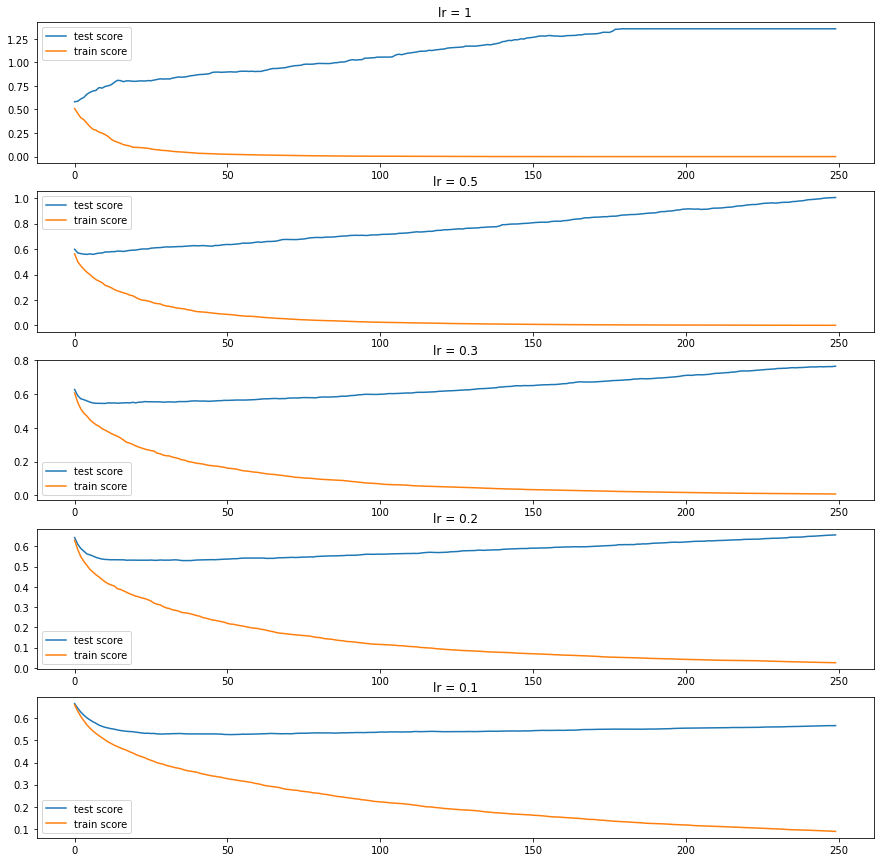

In [21]:
import matplotlib.pyplot as plt

# https://pyprog.pro/mpl/mpl_main_components.html
# https://pyprog.pro/mpl/mpl_adding_a_legend.html
lr_ar = [1, 0.5, 0.3, 0.2, 0.1]
fig, ax = plt.subplots(nrows = len(lr_ar), ncols =1, figsize=(15, 15) )
test_score_min_idx = []
train_score_min_idx = []

for lr_idx, lr in enumerate(lr_ar):
    print(lr)
    test_score, train_score = [], []
    clf = GradientBoostingClassifier(learning_rate=lr, random_state=SEED, n_estimators=250, verbose=False)
    clf.fit(X_train, y_train)
    for i, pred in enumerate(clf.staged_decision_function(X_test)):
        test_score.append(log_loss(y_test, f(pred)))
        
        
    idx, min_logloss = calc_min(test_score)
    test_score_min_idx.append((idx, min_logloss))
        
    if lr == 0.2:
        idx, min_logloss = calc_min(test_score)
        write2file_many(idx, round(min_logloss, 2), "2.txt")
    

    for i, pred in enumerate(clf.staged_decision_function(X_train)):
        train_score.append(log_loss(y_train, f(pred)))

    
    idx, min_logloss = calc_min(train_score)
    train_score_min_idx.append((idx, min_logloss))

    ax[lr_idx].plot(test_score, label='test score')
    ax[lr_idx].plot(train_score, label='train score')
    ax[lr_idx].set(title = f'lr = {lr}')
    ax[lr_idx].legend()
plt.show()

In [22]:
train_score_min_idx

[(180, 0.00020857611394801468),
 (249, 0.001022368076368321),
 (249, 0.00882967031395731),
 (249, 0.024906124380084924),
 (249, 0.08936962416274086)]

In [23]:
test_score_min_idx

[(0, 0.5822942594278475),
 (6, 0.5584259973942154),
 (10, 0.5432835808866866),
 (36, 0.5301645204906471),
 (51, 0.5259049090698129)]

In [24]:
rfc = RandomForestClassifier(n_estimators=36, random_state=SEED)
rfc.fit(X_train,y_train)
pred = rfc.predict_proba(X_test)
write2file(round(log_loss(y_test, pred), 2), '3.txt')

In [28]:
rfc = RandomForestClassifier(n_estimators=600, random_state=SEED)
rfc.fit(X_train,y_train)
pred = rfc.predict_proba(X_test)
print(round(log_loss(y_test, pred), 10))

0.5229584491
